In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statistics import mode
import copy
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import torch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import random
import scipy.stats
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import ConvLSTM3D
from keras.layers import BatchNormalization
from statistics import mode
import inspect

random.seed(2505)

Mounted at /content/drive


In [ ]:
#PreProcessing

In [ ]:
import os
os.chdir(r"/content/drive/My Drive")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#datasets = pd.read_csv('ETTh1.csv')
#datasets = pd.read_csv('ETTh2.csv')
#datasets = pd.read_csv('ETTm1.csv')
#datasets = pd.read_csv('ETTm2.csv')
#datasets = pd.read_csv('new_Shanghai AQI and Wheather 2014-2021.csv')
datasets = pd.read_csv('energydata_complete.csv')
datasets

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [ ]:
datasets['date'] = pd.to_datetime(datasets['date'],format='mixed').dt.date
#datasets['date'] = pd.to_datetime(datasets['date']).dt.date
datasets

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-11-01,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-11-01,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-11-01,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-11-01,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-11-01,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,2016-05-27,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,2016-05-27,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,2016-05-27,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [ ]:
datasets['date']=pd.to_datetime(datasets['date'])

In [ ]:
datasets.index = datasets.pop('date')

In [ ]:
datasets

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
2016-11-01,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2016-11-01,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
2016-11-01,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
2016-11-01,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
2016-05-27,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
2016-05-27,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117


In [ ]:
#ETT Dataset
#target = datasets['OT']
#target =pd.DataFrame(target,columns=['OT'])
#AQI Dataset
#target = datasets['AQI']
#target =pd.DataFrame(target,columns=['AQI'])
#Energy Dataset
target = datasets['RH_out']
target =pd.DataFrame(target,columns=['RH_out'])

In [ ]:
## PreProcessing

In [ ]:
target = target[np.isfinite(target).all(1)]

In [ ]:
#ETT Dataset
#test_data_size = 3484
#test_data_size = 13936

#AQI Dataset
#test_data_size = 500

#Energy Dataset
test_data_size = 3947

#Target
train_data_target = target[:-test_data_size]
test_data_target = target[-test_data_size:]


In [ ]:
print("Len Train Data Target",train_data_target.shape)
print("Len Test Data Target",test_data_target.shape)

Len Train Data Target (15788, 1)
Len Test Data Target (3947, 1)


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
#Target
train_data_target = scaler.fit_transform(train_data_target)
test_data_target = scaler.fit_transform(test_data_target)

In [ ]:
## Transform to Time Series

In [ ]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [ ]:
#ETT Dataset
#seq_length = 24
#AQI Dataset
#seq_length = 30
#Energy Dataset
seq_length = 24
#Target
X_train_target, y_train_target = create_sequences(train_data_target, seq_length)
X_test_target, y_test_target = create_sequences(test_data_target, seq_length)
X_train_target = torch.from_numpy(X_train_target).float()
y_train_target = torch.from_numpy(y_train_target).float()
X_test_target = torch.from_numpy(X_test_target).float()
y_test_target = torch.from_numpy(y_test_target).float()

In [ ]:
print("X train target",X_train_target.shape)
print("y train target",y_train_target.shape)
print("-------------------------------------")

X train target torch.Size([15763, 24, 1])
y train target torch.Size([15763, 1])
-------------------------------------


In [ ]:
print("X test target",X_test_target.shape)
print("y test target",y_test_target.shape)
print("-------------------------------------")


X test target torch.Size([3922, 24, 1])
y test target torch.Size([3922, 1])
-------------------------------------


In [ ]:
#Target
X_target = np.array(X_train_target)
Y_target = np.array(y_train_target)


In [ ]:
## Bi-GRU Model

In [ ]:
class BiGRU:
  def __init__(self, epochs, batch_size, learning_rate,beta_1,beta_2):
    self.epochs = epochs
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.beta_1 = beta_1
    self.beta_2 = beta_2

  def tensor(self):
    self.test_X_target_modelBiGRU = np.array(X_test_target)
    self.test_Y_target_modelBiGRU = np.array(y_test_target)
    self.test_Y_target = np.array(y_test_target)

  def model_BiGRU(self):
    #Let's build Bi-GRU
    modelBiGRU = keras.Sequential()
    #Add a GRU layer with 3 units.
    modelBiGRU.add(Bidirectional(layers.GRU(512,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True,
                     #input_shape=(X_train_target.shape[1], X_train_target.shape[2]))))
                     input_shape=(X_train_target.shape[1], X_train_target.shape[2]))))
    modelBiGRU.add(Bidirectional(layers.GRU(256,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(128,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(64,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(32,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(16,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(8,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(5,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=True)))
    modelBiGRU.add(Bidirectional(layers.GRU(3,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=False)))
    modelBiGRU.add(layers.Dropout(rate=0.01))
    #Add a Dense layer with 1 units (Since we are doing a regression task.
    modelBiGRU.add(layers.Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate, beta_1=self.beta_1, beta_2=self.beta_2,amsgrad=False)
    modelBiGRU.compile(loss='mean_squared_error', optimizer = optimizer)
    self.historymodelBiGRU = modelBiGRU.fit(X_target,Y_target, shuffle = False,epochs=self.epochs,batch_size=self.batch_size,validation_split=0.2,verbose=1)
    self.y_pred_modelBiGRU = modelBiGRU.predict(self.test_X_target_modelBiGRU)[:96] #[:96]
    return

  def predict(self):
    self.y_pred_target_modelBiGRU = self.y_pred_modelBiGRU.flatten()[:96] #[:96]
    self.y_test_target = self.test_Y_target_modelBiGRU.flatten()[:96] #[:96]

  def dataframe(self):
    self.result = pd.DataFrame(data={'Actual Value':self.y_test_target,'Bi-GRU':self.y_pred_target_modelBiGRU})
    return self.result

  def smape(self,a, f):
    return 1/len(self.a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

  def matrik_error(self):
    self.mse_modelBiGRU = mean_squared_error(self.result['Actual Value'], self.result['Bi-GRU'])
    self.mae_modelBiGRU = mean_absolute_error(self.result['Actual Value'], self.result['Bi-GRU'])
    #self.smape_ratio_cross_exMean = self.smape(first_strategy_result['Actual AQI'], first_strategy_result['AQI(R * Ex-Mean)'])
    self.r2_modelBiGRU = r2_score(self.result['Actual Value'], self.result['Bi-GRU'],multioutput='variance_weighted')

  def evaluation(self):
    print("MSE ",self.mse_modelBiGRU)
    print("MAE ",self.mae_modelBiGRU)
    #print("Smape Based ratio X exMean ",self.smape_ratio_cross_exMean)
    print("R2 ",self.r2_modelBiGRU)
    print("----------------------------------------------")

  def plotting(self):
    plt.plot(self.historymodelBiGRU.history['loss'], label = 'training loss')
    plt.plot(self.historymodelBiGRU.history['val_loss'], label = 'validation loss')
    plt.legend()
    return

  def run_all(self):
    self.tensor()
    self.model_BiGRU()
    self.predict()
    self.dataframe()
    self.matrik_error()
    self.evaluation()
    self.plotting()
    #self.train_target_plot()
    #self.train_eXfactor_plot()
    #self.train_ratio_plot()

Epoch 1/24
198/198 [==============================] - 424s 2s/step - loss: 0.0193 - val_loss: 0.0064
Epoch 2/24
198/198 [==============================] - 361s 2s/step - loss: 0.0069 - val_loss: 0.0088
Epoch 3/24
198/198 [==============================] - 344s 2s/step - loss: 0.0053 - val_loss: 0.0040
Epoch 4/24
198/198 [==============================] - 343s 2s/step - loss: 0.0037 - val_loss: 0.0028
Epoch 5/24
198/198 [==============================] - 364s 2s/step - loss: 0.0034 - val_loss: 0.0057
Epoch 6/24
198/198 [==============================] - 347s 2s/step - loss: 0.0031 - val_loss: 0.0094
Epoch 7/24
198/198 [==============================] - 345s 2s/step - loss: 0.0018 - val_loss: 0.0031
Epoch 8/24
198/198 [==============================] - 364s 2s/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/24
198/198 [==============================] - 364s 2s/step - loss: 0.0015 - val_loss: 0.0027
Epoch 10/24
198/198 [==============================] - 362s 2s/step - loss: 0.0014 - val_lo

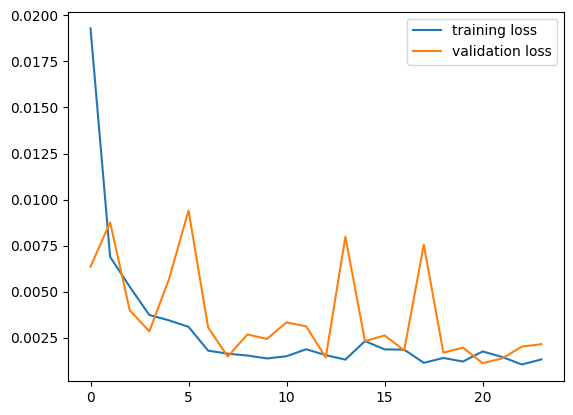

In [ ]:
#(epochs, batch_size, learning_rate,beta_1,beta_2)
biGRU = BiGRU(24,64,0.001,0.9,0.99)
biGRU.run_all()